# Analysis of the free apps in 2017/2018


As a company, we are ad revenue driven. To help with this goal I have worked on
the App Profiles available on the 2 major App stores and compared some benchmark apps against others in their genre/category.

Using free but incomplete datasets with documentation below:

[Google Play Store dataset](https://www.kaggle.com/lava18/google-play-store-apps/home) - Created 2018-09-04

[Apple App Store dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) - Collected July 2017


In [1]:
from csv import reader

def open_csv_list(dataset):
    opened = open(dataset, encoding='utf-8')
    read = reader(opened)
    dataset = list(read)
    return dataset


gps_dataset = open_csv_list('googleplaystore.csv')
aas_dataset = open_csv_list('AppleStore.csv')

print(gps_dataset[:3])
print('-' * 100)
print(aas_dataset[:3])


[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], ['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'], ['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']]
----------------------------------------------------------------------------------------------------
[['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'], ['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1'], ['38980125

# Useful variables required repeatedly

The first chunk of code is to check if a known bad row exists and then delete it if required. It also prints pre and posts the check for visual confirmation we are not damaging other rows

- `Lenghtcheck` is for making length check's easier to read and consistent.

- `X_app_name` is the array location for the name in a particular dataset
- `X_app_review` is the same for the reviews
- `X_app_price` is the location of pricing data
- `X_app_genre` is the location for genre data
- `google_app_installs`is the locations for the number of installs, please note we do not have this data for the Apple App Store


In [2]:
#This block checks for a known bad row and removes it 10473
print('Bad row check :')
print('\n')
print(gps_dataset[10473])
if gps_dataset[10473][0] == 'Life Made WI-Fi Touchscreen Photo Frame':
    del gps_dataset[10473]    
print('\n')
print(gps_dataset[10473])
print('-' * 100)

def lenght_check( dataset_google, dataset_apple):
    print('\n')
    print('Results from this code block are:')
    print('\n')
    print('The lenght of this function Google dataset is now : ', len(dataset_google))
    print('\n')
    print('The lenght of this function Apple dataset is now : ', len(dataset_apple))
    print('\n')
    print('-' * 100)
    

google_app_name = 0 #Array location for name's of applications - Google
apple_app_name = 1 #Array location for name's of applications - Apple

google_app_review = 3 #Array location for reviews - Google
apple_app_review = 5 #Array location for reviews - Apple

google_app_price = 7 #Array location for prices - Google
apple_app_price = 4 #Array location for prices - Apple

google_app_genre = 9 #Array location for genres - Google
google_app_category = 1 #Array location for category - Google
apple_app_genre = 11 #Array location for primary genre - Apple

google_app_install = 5 #Array Location for number of installs



Bad row check :


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']
----------------------------------------------------------------------------------------------------


## Checking for duplicates and number of duplicates

The below function is for checking for duplicate app names.

- The function can return either the unique or the duplicate application names
- It needs to be called with at least one variable which is the `dataset` you wish it to work on
- Returns a list, by default it returns the duplicate names. 

We will later remove the duplicates by selecting for the highest number of reviews as this is likely fresher data.


In [3]:
def duplicates( dataset, array_loc_name, duplicates=True):
    duplicate_apps = []
    unique_apps = []
    for app in dataset:
        name = app[array_loc_name]
        if name in unique_apps:
            duplicate_apps.append(name)
        else:
            unique_apps.append(name)
    if duplicates:
        return duplicate_apps
    return unique_apps

gps_dataset_dups = duplicates( gps_dataset, google_app_name)
aas_dataset_dups = duplicates( aas_dataset, apple_app_name)

print(gps_dataset_dups[:10])
print('\n')
print('Number of duplicate apps: ', len(gps_dataset_dups))
print('Number of unique apps: ', (len(duplicates( gps_dataset, google_app_name, False)) -1)) #-1 for the header
print('-' * 100)
print(aas_dataset_dups[:10])
print('\n')
print('Number of duplicate apps: ', len(aas_dataset_dups))
print('Number of unique apps: ', (len(duplicates( aas_dataset, apple_app_name, False)) -1))

['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']


Number of duplicate apps:  1181
Number of unique apps:  9659
----------------------------------------------------------------------------------------------------
['Mannequin Challenge', 'VR Roller Coaster']


Number of duplicate apps:  2
Number of unique apps:  7195


## Doing something about the duplicates

First, we are going to get the highest reviews for all the duplicate (and unique) apps

We are going to do this by taking the `App` name and the number of reviews into a separate `dictionary`
- This is going to be achieved by a `for` loop and 2 `if` statements
- This takes a single argument which will be the dataset required to be worked on
- It will return a dictionary with the app name being the key and reviews being the value


In [4]:
def highest_reviews_dict( dataset, array_loc_name, array_loc_review):
    reviews_max = {}
    for app in dataset[1:]:
        name = app[array_loc_name]
        n_reviews = float(app[array_loc_review])
        if name in reviews_max and reviews_max[name] < n_reviews:
            reviews_max[name] = n_reviews
        elif name not in reviews_max:
            reviews_max[name] = n_reviews
    return reviews_max

gps_max_reviews = highest_reviews_dict(gps_dataset, google_app_name, google_app_review)
aas_max_reviews = highest_reviews_dict(aas_dataset, apple_app_name, apple_app_review)

### Using the dictionary we just created

Now we are going to clean the list of duplicates using the dictionary of unique names and the highest number of reviews.

We are going to do this with another `loop` and set of `if` statements

And again I am going to create this as a function
    - Please note that this function removes the header


In [5]:
def dedup_with_reviews(dataset, reviews, array_loc_name, array_loc_review):
    cleaned = []
    already_added = []
    for row in dataset[1:]:
        name = row[array_loc_name]
        n_reviews = float(row[array_loc_review])
        if reviews[name] == n_reviews and name not in already_added:
            cleaned.append(row)
            already_added.append(name)
    return cleaned

gps_dataset = dedup_with_reviews(gps_dataset, gps_max_reviews, google_app_name, google_app_review)
aas_dataset = dedup_with_reviews(aas_dataset, aas_max_reviews, apple_app_name, apple_app_review)

lenght_check(gps_dataset,aas_dataset)    



Results from this code block are:


The lenght of this function Google dataset is now :  9659


The lenght of this function Apple dataset is now :  7195


----------------------------------------------------------------------------------------------------


## Targeting an English Audience

- Using ASCII numbering we are going to check if a member of the string is over 127 which is where the English character set lies
- We are going to loop through the individual characters of the names
- Due to items like emoji's and copywrite marks we will require 3 none English characters

The reason we are doing the above is that if a name contains more than 3 non-English characters then it is likely targeted at a non-English speaking audience which is not our general target.


In [6]:
def ascii_check_127(name):
    letter = ''
    count = 0
    for character in name:
        if ord(character) >= 127:
            count += 1
        elif count == 3:
            return False
    return True

### Now to use the function `ascii_check_127` to clean our data

We are going to create a function to clean the 2 datasets of apps we are assuming are targeting non-English speaking audiences

It does a for loop through the dataset extracting the name and passing that to `ascii_check_127`  
- Using the returned boolean to decide whether or not to add the list to the `english_lang_only` list of lists


In [7]:
def non_english_lang_clean( dataset, array_loc_name):
    english_lang_only = []
    name = ''
    for row in dataset:
        name = row[array_loc_name]
        if ascii_check_127(name):
            english_lang_only.append(row)
    return english_lang_only

gps_dataset = non_english_lang_clean( gps_dataset, google_app_name)
aas_dataset = non_english_lang_clean( aas_dataset, apple_app_name)

lenght_check( gps_dataset, aas_dataset)



Results from this code block are:


The lenght of this function Google dataset is now :  9636


The lenght of this function Apple dataset is now :  7114


----------------------------------------------------------------------------------------------------


## Removal of paid apps 

Being that we as a company do not charge for any of our apps we need to remove the app that is charged for

Using a similar function as we have been using throughout we are going to loop through the apps checking on price and returning only those that are free to the end user.
- The function will be built to return free or paid apps but will default to free
   - Written in such a way that the loop is only done for the selected type of app


In [8]:
def chargeable_checker( dataset, array_loc_price, Free=True):
    free_apps = []
    paid_apps = []
    app_price = 0.0
    if Free:
        for row in dataset:
            app_price = row[array_loc_price]
            if app_price == '0' or app_price == '0.0':
                free_apps.append(row)
        else:
            for row in dataset:
                app_price = row[array_loc_price]
                if app_price is not '0' or app_price is not '0.0':
                    paid_apps.append(row)
        
    if Free:
        return free_apps
    return paid_apps

gps_dataset = chargeable_checker( gps_dataset, google_app_price)
aas_dataset = chargeable_checker( aas_dataset, apple_app_price)

lenght_check( gps_dataset,aas_dataset)



Results from this code block are:


The lenght of this function Google dataset is now :  8884


The lenght of this function Apple dataset is now :  3983


----------------------------------------------------------------------------------------------------


## App profiles

We need to make the best use of our resources so we need to find something that works for the Google Play Store as well as the Apple App Store. As the Google Play Store has less stringent entry process we will first target that
    - As per our normal operating procedure, we will build an MVP for release
    - If it gains traction with our user profile then we can develop it further
    - If profitable after 6 months we will create the IOS version 

A big difference in the datasets is that the Google set includes 2 fields for the genre and one contains multiple genres whereas the Apple set only includes the primary genre

I am going to split this into 2 functions, one to display the frequency table and one to produce the table.
    
- `freq_table` Will product the tables
    - It will require which dataset (list of lists) to work on and the index (int) you require a frequency table of.
    - It will return a dictionary with the keys as items in the index and values as percentages of the dataset
    

- `display_table` Will turn the tables into something easier to read.
    - It will require which dataset (list of lists) to work on and the index (int) you require a frequency table displayed
    - It will call `freq_table` passing both arguments
    - It will loop through the returned dictionary turning it into a tuple with the key as the dictionary's value and the value as the dictionary's key
        - For example  "games : 99" in the dictionary becomes "99 : games" in the tuple
    - It will sort the tuples into number order highest to lowest using `sorted(x, reverse = True)` and convert this into a list of lists
    - This will then print the list but in the dictionary order so the genre is first not second
        - For example "99 : games" will be printed "games : 99"


In [9]:
def freq_table( dataset, index):
    freq = {}
    genre = ''
    for row in dataset:
        genre = row[index]
        if genre in freq:
            freq[genre] += 1
        else:
            freq[genre] = 1
    for key in freq:
        freq[key] = round((freq[key] / len(dataset)) * 100,1)
    return freq

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

apple_genre_freq = freq_table( aas_dataset, apple_app_genre)
google_category_freq = freq_table( gps_dataset, google_app_category)
google_genre_freq = freq_table( gps_dataset, google_app_genre)
        
print("-" * 50)
print("\n")
apple_table = display_table( aas_dataset, apple_app_genre)
print("\n")
print("-" * 50)
print("\n")
google_cat_table = display_table( gps_dataset, google_app_category)
print("\n")
print("-" * 50)
print("\n")
google_genre_table = display_table( gps_dataset, google_app_genre)
print("\n")
print("-" * 50)

--------------------------------------------------


Games : 56.2
Entertainment : 8.2
Photo & Video : 4.2
Social Networking : 3.6
Education : 3.2
Shopping : 2.8
Utilities : 2.6
Lifestyle : 2.2
Sports : 1.9
Health & Fitness : 1.9
Finance : 1.9
Music : 1.7
Productivity : 1.6
News : 1.5
Book : 1.5
Travel : 1.4
Food & Drink : 1.1
Weather : 0.8
Reference : 0.5
Navigation : 0.5
Business : 0.5
Medical : 0.2
Catalogs : 0.2


--------------------------------------------------


FAMILY : 19.0
GAME : 9.7
TOOLS : 8.4
BUSINESS : 4.6
PRODUCTIVITY : 3.9
LIFESTYLE : 3.9
FINANCE : 3.7
MEDICAL : 3.5
SPORTS : 3.4
PERSONALIZATION : 3.3
COMMUNICATION : 3.2
HEALTH_AND_FITNESS : 3.1
PHOTOGRAPHY : 2.9
NEWS_AND_MAGAZINES : 2.8
SOCIAL : 2.7
TRAVEL_AND_LOCAL : 2.3
SHOPPING : 2.3
BOOKS_AND_REFERENCE : 2.2
DATING : 1.9
VIDEO_PLAYERS : 1.8
MAPS_AND_NAVIGATION : 1.4
FOOD_AND_DRINK : 1.2
EDUCATION : 1.2
ENTERTAINMENT : 1.0
LIBRARIES_AND_DEMO : 0.9
AUTO_AND_VEHICLES : 0.9
WEATHER : 0.8
HOUSE_AND_HOME : 0.8
PARENTING :

## User ratings/Installs

We are now going to include the user ratings into our analysis for the apple set and the number of installs for the google set. Due to the mismatch of the data we received we have used the closest possible metrics. 

Due to the google install data being a string containing `+` and `,` we will have to do some more data cleaning. 


In [10]:
for row in gps_dataset:
    installs = row[google_app_install]
    installs = installs.replace('+','')
    installs = installs.replace(',','')
    row[google_app_install] = installs

def user_rated_genres( dataset, freq_table, array_loc_genre, array_loc_installs):
    genre_avg_rating = []
    for genre in freq_table:
        total = 0
        len_genre = 0
        avg_rating = 0
        for row in dataset:
            genre_app = row[array_loc_genre]
            if genre == genre_app:
                ratings = row[array_loc_installs]
                total += float(ratings)
                len_genre += 1
        avg_rating = round( total / len_genre)
        genre_avg_rating.append([ avg_rating, genre])
    genre_avg_rating = sorted( genre_avg_rating, reverse = True)
    return genre_avg_rating

apple_genres_reviews = user_rated_genres( aas_dataset, apple_genre_freq, apple_app_genre, apple_app_review)
google_category_reviews = user_rated_genres( gps_dataset, google_category_freq, google_app_category, google_app_install)
google_genres_reviews = user_rated_genres( gps_dataset, google_genre_freq, google_app_genre, google_app_install)

print(apple_genres_reviews[:5])
print(google_category_reviews[:5])
print(google_genres_reviews[:5])

[[70998, 'Reference'], [56482, 'Music'], [53452, 'Social Networking'], [48795, 'Weather'], [27414, 'Photo & Video']]
[[38456154, 'COMMUNICATION'], [24727872, 'VIDEO_PLAYERS'], [23253652, 'SOCIAL'], [17772019, 'PHOTOGRAPHY'], [16738958, 'PRODUCTIVITY']]
[[38456154, 'Communication'], [35333333, 'Adventure;Action & Adventure'], [24947336, 'Video Players & Editors'], [23253652, 'Social'], [23028171, 'Arcade']]


## Lets split out the games

We are going to split out the games so we can concentrate on those.

Going to move the dataset over to panda DataFrames as it is going to be simpler to do this with a boolean filter. This could do with a rebuild in panda from the start but for now, we will build on what is currently in place.


In [11]:
genre_games = ['Games', 'GAME', 'Action', 'Simulation', 'Casual', 'Arcade', 'Puzzle', 'Racing', 'Strategy', 'Role Playing', 'Adventure', 'Card', 'Trivia', 'Casino', 'Board']

import pandas as pd

gps_df = pd.DataFrame( gps_dataset, index = None, columns = None)
aas_df = pd.DataFrame( aas_dataset, index = None, columns = None)
gps_df = gps_df.apply(pd.to_numeric, errors='ignore')
gps_df.iloc[:,2] = gps_df.iloc[:,2].apply(pd.to_numeric, errors='coerce')
aas_df = aas_df.apply(pd.to_numeric, errors='ignore')

def just_games( dataset, array_loc_genre):
    output = dataset[dataset.iloc[:,array_loc_genre].isin(genre_games)]
    return output

gps_games_df = just_games( gps_df, google_app_genre)
aas_games_df = just_games( aas_df, apple_app_genre)

print(gps_games_df.head())
print('-' * 100)
print(aas_games_df.head())

                         0     1    2        3    4          5     6   7   \
1235              Solitaire  GAME  4.7   254258  23M   10000000  Free   0   
1236             Sonic Dash  GAME  4.5  3778921  75M  100000000  Free   0   
1237                PAC-MAN  GAME  4.2   685981  37M  100000000  Free   0   
1238    Bubble Witch 3 Saga  GAME  4.7  1732263  78M   50000000  Free   0   
1239  Race the Traffic Moto  GAME  3.8   270687  38M   10000000  Free   0   

            8       9               10        11            12  
1235  Everyone    Card  August 1, 2018   2.137.0    4.1 and up  
1236  Everyone  Arcade   July 26, 2018  3.8.5.Go    4.1 and up  
1237  Everyone  Arcade    May 15, 2018     6.6.3    4.1 and up  
1238  Everyone  Puzzle   July 17, 2018     4.8.4    3.0 and up  
1239      Teen  Racing   July 20, 2018    1.0.16  4.0.3 and up  
----------------------------------------------------------------------------------------------------
           0                 1          2    3

## We are going to search for some previous games

We have selected some games to be a benchmark but first, we need to check if they are in our datasets.

Due to these being incomplete datasets (freely supplied) we may not have all of the benchmark games and the data will be out of date.


In [12]:
benchmark_games = ['Looper!', 'PLANK!', 'TENS!', 'SPILLZ']

def check_for_benchmarks( dataset, array_loc_name):
    output = dataset[dataset.iloc[:,array_loc_name].isin(benchmark_games)]
    return output

gps_benchmark_df = check_for_benchmarks(gps_games_df, google_app_name)
aas_benchmark_df = check_for_benchmarks(aas_games_df, apple_app_name)

print(gps_benchmark_df)
print('-' * 100)
print(aas_benchmark_df)

           0     1    2      3    4        5     6   7         8       9   \
1261   PLANK!  GAME  4.7   7196  38M   500000  Free   0  Everyone  Arcade   
1262  Looper!  GAME  4.6  48256  62M  1000000  Free   0  Everyone  Puzzle   

                 10     11          12  
1261  July 17, 2018  1.0.2  4.3 and up  
1262  July 20, 2018  1.2.0  4.1 and up  
----------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Index: []


## Compare benchmarks against averages

As we only have data for our benchmarks in the google play store dataset we are going to ignore the apple dataset for now.

We are going to compare our benchmarks against the averages for the google play store in total and in their particular sub-genre.


In [13]:
plank = gps_benchmark_df.iloc[0]
looper = gps_benchmark_df.iloc[1]
avg = gps_games_df.mean()
avg = avg.apply(pd.to_numeric)
print(plank)
print('-' * 50)
print(looper)
print('-' * 50)
print(avg)

0            PLANK!
1              GAME
2               4.7
3              7196
4               38M
5            500000
6              Free
7                 0
8          Everyone
9            Arcade
10    July 17, 2018
11            1.0.2
12       4.3 and up
Name: 1261, dtype: object
--------------------------------------------------
0           Looper!
1              GAME
2               4.6
3             48256
4               62M
5           1000000
6              Free
7                 0
8          Everyone
9            Puzzle
10    July 20, 2018
11            1.2.0
12       4.1 and up
Name: 1262, dtype: object
--------------------------------------------------
2    4.196369e+00
3    4.919906e+05
5    1.135784e+07
7    0.000000e+00
dtype: float64


### Graphing

Below are how the benchmarks compare against the average across all games as charts.


Using a select set of colours known to be colour blind safe. 
[Points of View: Color blindness by Bang Wong](http://www.nature.com/nmeth/journal/v8/n6/full/nmeth.1618.html#ref1)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

plt.xkcd()

labels = ['Plank!', 'Looper!', 'Average in PlayStore']
colours = [[0,158/255,115/255], [213/255,94/255,0], [0,114/255,178/255]]

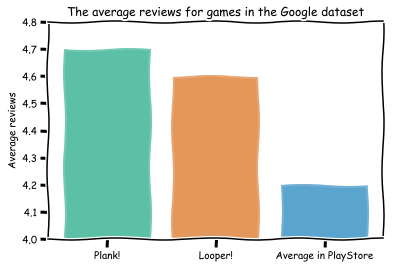

In [21]:
y_pos = np.arange(len(labels))
performance = [plank[2], looper[2], round(avg[2], 2)]
 
plt.bar(y_pos, performance, align='center', alpha=0.4, color = colours )
plt.xticks(y_pos, labels)
plt.ylabel('Average reviews')
plt.title('The average reviews for games in the Google dataset')
plt.axes().set_ylim(4, 4.8)
 
plt.show()

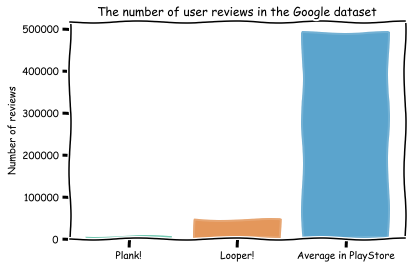

In [16]:
y_pos = np.arange(len(labels))
performance = [plank[3], looper[3], avg[3]]
 
plt.bar(y_pos, performance, align='center', alpha=0.4, color = colours)
plt.xticks(y_pos, labels)
plt.ylabel('Number of reviews')
plt.title('The number of user reviews in the Google dataset')

plt.show()

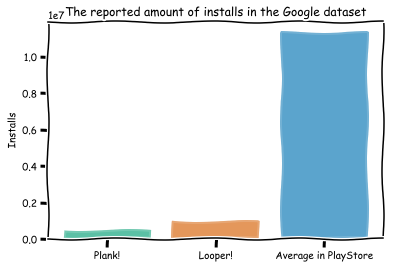

In [17]:
y_pos = np.arange(len(labels))
performance = [plank[5], looper[5], avg[5]]
 
plt.bar(y_pos, performance, align='center', alpha=0.4, color = colours)
plt.xticks(y_pos, labels)
plt.ylabel('Installs')
plt.title('The reported amount of installs in the Google dataset')

plt.show()

## Compare against the sub category

Below we are going to compare Plank! against the `Arcade` sub category and Looper! against the `Puzzle` sub category.

Possibily due to incomplete data we are not going to compare against number of reviews and number of installs.

In [18]:
def avg_reviews(data_a,data_b,colours,labels):
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, [data_a,data_b], align = 'center', alpha=0.4, color = colours )
    plt.xticks(y_pos, labels)
    plt.ylabel('Average reviews')
    plt.title('The average reviews')
    plt.axes().set_ylim(4, 4.8)
    plt.show()

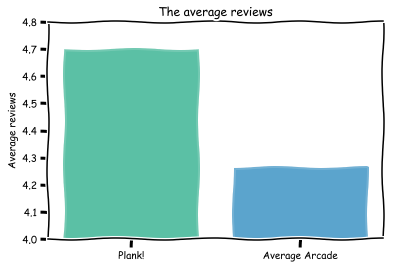

In [19]:
avg_arcade = gps_games_df[gps_games_df.iloc[:,9] == 'Arcade'].mean()
avg_arcade = avg_arcade.apply(pd.to_numeric)

labels_arcade = ['Plank!', 'Average Arcade']
colours_arcade = [[0,158/255,115/255], [0,114/255,178/255]]

avg_reviews(plank[2],avg_arcade[2],colours_arcade,labels_arcade)

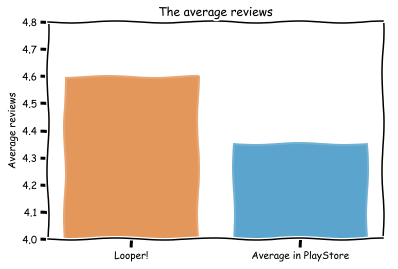

In [20]:
avg_puzzle = gps_games_df[gps_games_df.iloc[:,9] == 'Puzzle'].mean()
avg_puzzle = avg_puzzle.apply(pd.to_numeric)

labels_puzzle = ['Looper!', 'Average in PlayStore']
colours_puzzle = [[213/255,94/255,0], [0,114/255,178/255]]

avg_reviews(looper[2],avg_puzzle[2],colours_puzzle,labels_puzzle)